In [87]:
import os
path = "C:/Users/mghn_/Desktop/Imarticus_Project"
os.chdir(path)
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [88]:
print(os.getcwd())

C:\Users\mghn_\Desktop\Imarticus_Project


In [102]:
import pandas as pd
import numpy as np

data=pd.read_csv("TrainData_CSM.csv")

In [103]:
data.dtypes

loan_amnt                     float64
term                            int64
int_rate                      float64
grade                           int64
sub_grade                       int64
emp_title                       int64
emp_length                    float64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
issue_d                        object
pymnt_plan                      int64
purpose                         int64
title                           int64
zip_code                        int64
addr_state                      int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
initial_list_status             int64
out_prncp   

In [104]:
data.shape

(486159, 39)

In [105]:
data.drop('issue_d',axis=1,inplace=True)

In [106]:
y=data['default_ind']
X=data.drop('default_ind',axis=1)

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

0    441856
1     44303
Name: default_ind, dtype: int64


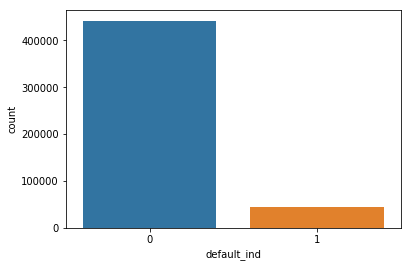

In [108]:
#Visualise the Dataset - target column distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print(data['default_ind'].value_counts())
ax = sns.countplot(x='default_ind',data=data)
#Imbalanced class distribution is seen here

In [109]:
# Oversampling of underrepresented class
# Class to perform over-sampling using SMOTE

from imblearn.over_sampling import SMOTE
doOversampling = True

if doOversampling:
# Apply regular SMOTE - Synthetic Minority Over-sampling Technique
    sm = SMOTE(kind='regular')
    X_train, y_train, = sm.fit_sample(X_train, Y_train)
    print('Training Set Shape after oversampling: ', X_train.shape, y_train.shape)
    print(pd.crosstab(y_train,y_train))
else:
    X_train = X_train
    y_train = y_train 

Training Set Shape after oversampling:  (707196, 37) (707196,)
col_0       0       1
row_0                
0      353598       0
1           0  353598


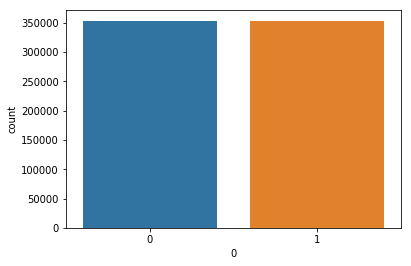

In [110]:
#To check the new distribution
check = pd.DataFrame(y_train)
#check.head(5)
import seaborn as sns
ax = sns.countplot(x=0, data=check)

In [111]:
#Model building starts
from sklearn.linear_model import LogisticRegression

In [112]:
logmodel=LogisticRegression()

In [113]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [114]:
predictions=logmodel.predict(X_test)

In [115]:
from sklearn.metrics import classification_report

In [116]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99     88258
          1       0.90      0.94      0.92      8974

avg / total       0.99      0.99      0.99     97232



In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix(Y_test,predictions)

array([[87330,   928],
       [  522,  8452]], dtype=int64)

In [120]:
from sklearn.metrics import roc_curve

In [121]:
y_pred_prob=logmodel.predict_proba(X_test)[:,1]

In [122]:
fpr,tpr,threshold=roc_curve(Y_test,y_pred_prob)

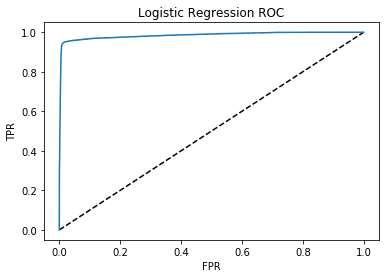

In [123]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression ROC")
plt.show()

In [124]:
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(Y_test,y_pred_prob),5))

0.98475


In [22]:
#Testing Accuray in Test Data


In [125]:
testdata=pd.read_csv("TestData_CSM.csv")

In [126]:
testdata.drop('issue_d',axis=1,inplace=True)

In [127]:
Y=testdata['default_ind']
X=testdata.drop('default_ind',axis=1)

In [128]:
p=logmodel.predict(X)

In [129]:
print(classification_report(Y,p))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99    367646
          1       0.30      0.86      0.44      2164

avg / total       1.00      0.99      0.99    369810



In [130]:
confusion_matrix(Y,p)

array([[363264,   4382],
       [   309,   1855]], dtype=int64)

In [131]:
y_pred=logmodel.predict_proba(X)[:,1]

In [132]:
fpr,tpr,threshold=roc_curve(Y,y_pred)

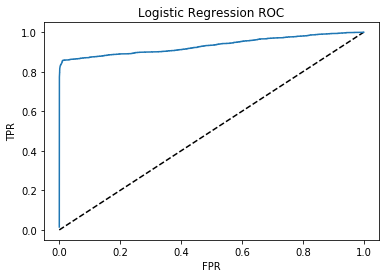

In [133]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression ROC")
plt.show()

In [134]:
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(Y,p),5))

0.92264


In [135]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
cols = ['Model', 'ROC Score', 'Precision Score', 'Recall Score','Accuracy Score']
models_report = pd.DataFrame(columns = cols)
tmp1 = pd.Series({'Model': " Logistic Regression Report",
                 'ROC Score' : roc_auc_score(Y,p),
                 'Precision Score': precision_score(Y, p),
                 'Recall Score': recall_score(Y,p),
                 'Accuracy Score': accuracy_score(Y,p)})
model1_report = models_report.append(tmp1, ignore_index = True)
model1_report

,Model,ROC Score,Precision Score,Recall Score,Accuracy Score
0,Logistic Regression Report,0.922645,0.297419,0.857209,0.987315


In [136]:
#Using GridSearchCV for parameter tuning
from sklearn.model_selection import GridSearchCV
c_space=np.logspace(-5,8,15)
param_grid={'C':c_space}
logitReg=LogisticRegression()
logitReg_cv=GridSearchCV(logitReg,param_grid,cv=5)
logitReg_cv.fit(X,Y)
print('Best parameters:',logitReg_cv.best_params_)
print("Best score:",logitReg_cv.best_score_)

Best parameters: {'C': 0.4393970560760795}
Best score: 0.9985830561639761


In [82]:
print(roc_auc_score(Y,y_pred))

0.9317032428617165
